### Linear regression computation.

There are several sections in this notebook.  The first, loading and preparation of data.  Then, hand calculation of the linear regression for a given data set.  Next, visualization of the linear relationship, the fitted line, and residuals.  Finally, using built-in python libraries that compute linear regression automatically as a practical method.  

In [3]:
# environment setup
# find the current working directory
import os, sys
os.path.abspath(os.path.dirname(sys.argv[0]))

'C:\\ProgramData\\Anaconda3\\lib\\site-packages'

In [56]:
# change to the proper directory
os.chdir('')
os.getcwd()

In [5]:
# load the data
import pandas as pd 
import numpy as np 
file = 'data-ex-2-1_(Rocket_Prop).xls'
df = pd.read_excel(file)

### Descriptive statistics to know the data.  

Common commands include head(), info() and columns.

In [6]:
df.head()

,"Observation, i","Shear Strength, yi (psi)","Age of Propellant, xi (weeks)"
0,1,2158.70,15.50
1,2,1678.15,23.75
2,3,2316.00,8.00
3,4,2061.30,17.00
4,5,2207.50,5.50


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Observation, i                 20 non-null     int64  
 1   Shear Strength, yi (psi)       20 non-null     float64
 2   Age of Propellant, xi (weeks)  20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 608.0 bytes


In [8]:
df.columns

Index(['Observation, i', 'Shear Strength, yi (psi)',
       'Age of Propellant, xi (weeks)'],
      dtype='object')

### Pandas manipulation section.  
Using 2 methods:  
1. reindexing - making a column an index  
2. renaming a column  

In [9]:
df['xi'] = df['Age of Propellant, xi (weeks)']
df['yi'] = df['Shear Strength, yi (psi)']

In [10]:
# new index name
df = df.set_index('Observation, i')

In [11]:
# rename column
df = df.rename({'Shear Strength, yi (psi)':'y'}, axis='columns')

In [12]:
df.head()

,y,"Age of Propellant, xi (weeks)",xi,yi
"Observation, i",,,,
1,2158.70,15.50,15.50,2158.70
2,1678.15,23.75,23.75,1678.15
3,2316.00,8.00,8.00,2316.00
4,2061.30,17.00,17.00,2061.30
5,2207.50,5.50,5.50,2207.50


### Visualization  
Visualize what the data of interest looks like to better understand the information.  

Two ways to show a scatter plot:  
- plot with 'o' feature  
- scatter  
- pandas built-in plot  
- plot the linear model over the data  

The differences between the first two are summarized from this [source](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html).  

For simple & quick plotting view of what the data is, [pyplot style](https://matplotlib.org/3.2.0/tutorials/introductory/usage.html#the-object-oriented-interface-and-the-pyplot-interface) is sufficient.  For better presentaion, the OO-style is preferable.  

Text(0.5, 1.0, 'Sample Observe Data')

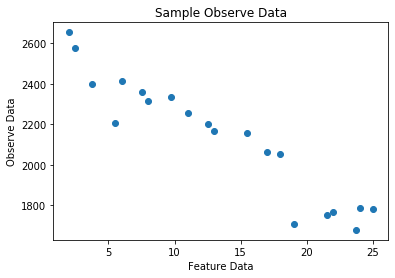

In [13]:
import matplotlib.pyplot as plt 
plt.scatter(df['xi'], df['yi'])
plt.xlabel('Feature Data')
plt.ylabel('Observe Data')
plt.title('Sample Observe Data')

Text(0.5, 1.0, 'Simple plot of given data.')

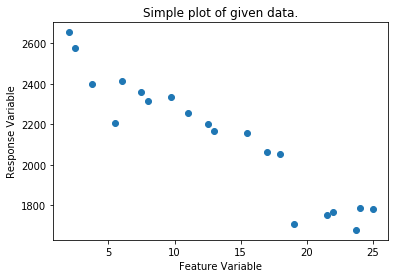

In [14]:
plt.plot(df['xi'], df['yi'], 'o')
plt.xlabel('Feature Variable')
plt.ylabel('Response Variable')
plt.title('Simple plot of given data.')

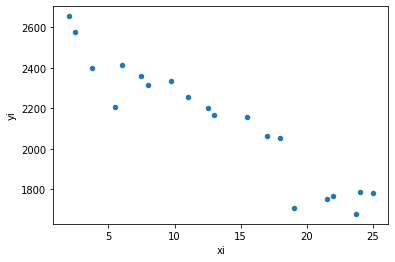

In [15]:
# plotting directly from pandas, note the axis labels comes from the column names but no ability to quickly add titles
df.plot.scatter(x='xi', y='yi')

### Calculation of the regression model.

In [16]:
# calculate the key elements
x_bar = df['xi'].mean()
y_bar  = df['yi'].mean()
df['Sxx'] = np.power(df['xi'] - x_bar, 2.)
df['Sxy'] = df['yi']*(df['xi'] - x_bar)

In [17]:
# the estimate calculations
Sxx = df['Sxx'].sum()
Sxy = df['Sxy'].sum()
B1_hat = Sxy/Sxx
B0_hat  = y_bar - B1_hat*x_bar
print('Sxx: ', Sxx)
print('Sxy: ', Sxy)
print('Coefficients, intercept & slope: ', B0_hat, B1_hat)

Sxx:  1106.559375
Sxy:  -41112.654375000035
Coefficients, intercept & slope:  2627.8223590012967 -37.15359094490527


Least squares fit:  
$\hat{y} = \hat{\beta_0} + \hat{\beta_1} x$  

Residuals:  
$e_i = y_i - \hat{y_i}$  


In [18]:
df['y_hat'] = B0_hat + B1_hat*df['xi']
df['residual, ei'] = df['yi'] - df['y_hat']
df.head()

,y,"Age of Propellant, xi (weeks)",xi,yi,Sxx,Sxy,y_hat,"residual, ei"
"Observation, i",,,,,,,,
1,2158.70,15.50,15.50,2158.70,4.568906,4614.221250,2051.941699,106.758301
2,1678.15,23.75,23.75,1678.15,107.900156,17431.783125,1745.424574,-67.274574
3,2316.00,8.00,8.00,2316.00,28.756406,-12419.550000,2330.593631,-14.593631
4,2061.30,17.00,17.00,2061.30,13.231406,7497.978750,1996.211313,65.088687
5,2207.50,5.50,5.50,2207.50,61.818906,-17356.468750,2423.477609,-215.977609


Text(0.5, 1.0, 'Least-Squares Fit')

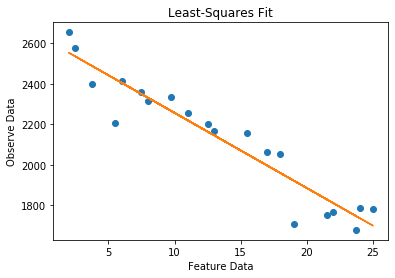

In [19]:
# plot the predicted model over the data
plt.plot(df['xi'], df['yi'], 'o')
plt.plot(df['xi'], df['y_hat'])
plt.xlabel('Feature Data')
plt.ylabel('Observe Data')
plt.title('Least-Squares Fit')

Text(0.5, 1.0, 'Predicted vs Observe')

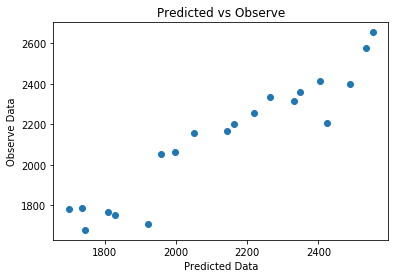

In [20]:
# What does the correlation look like?
plt.plot(df['y_hat'], df['yi'], 'o')
plt.xlabel('Predicted Data')
plt.ylabel('Observe Data')
plt.title('Predicted vs Observe')

Text(0.5, 1.0, 'Residuals of the predicted data.')

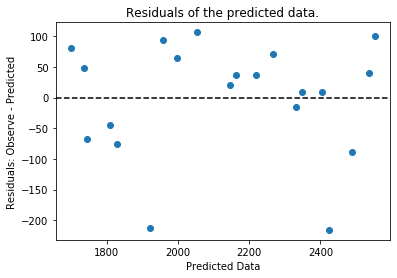

In [21]:
# plotting the residuals
plt.plot(df['y_hat'], df['residual, ei'], 'o')
plt.axhline(y=0.0, color='black', linestyle='--')
plt.xlabel('Predicted Data')
plt.ylabel('Residuals: Observe - Predicted')
plt.title('Residuals of the predicted data.')

### [Seaborn](https://seaborn.pydata.org/tutorial/regression.html)  
The link contains 2 methods for plotting linear regression.  It also has a method that calculates the residuals.


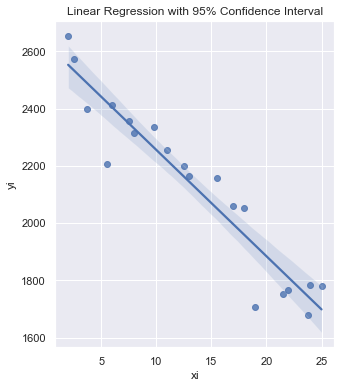

In [22]:
# using seaborn for regression plot with confidence interval of 95%
import seaborn as sns
sns.set(style='whitegrid')
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(5,6))
ax.set(xlabel='Feature Data', ylabel='Observe Data', title='Linear Regression with 95% Confidence Interval')
sns.regplot(x='xi', y='yi', data=df, ax=ax)

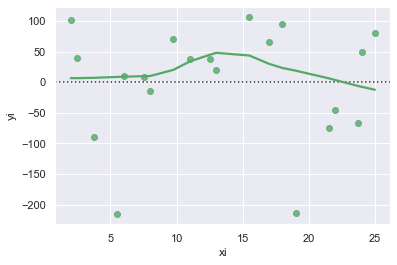

In [23]:
# calculate and plot the residuals
sns.residplot(df['xi'], df['yi'], lowess=True, color='g')

### Least-Squares Estimators and Fitted Regression Model  

Both $\hat{\beta_0}$ & $\hat{\beta_1}$ are estimates, unbiased estimators of $\beta_0$ & $\beta_1$, respectively.  In order to have confidence in how the linear model fit the data, one of the steps is to find the spread of the data away from the fitted model.  This will be done with variance, $\hat{\sigma}^2$, known as residual mean square, and standard deviation, $\hat{\sigma}$, the standard error of regression.   

In [24]:
# first calculate the corrected sum of squares
n = df['yi'].count()    # number of observations
SSt = np.sum(np.power(df['yi'], 2.)) - ( np.power(np.sum(df['yi']), 2.)/n )
print('Corrected Sum of Squares: {0:0.2f}'.format(SSt))

Corrected Sum of Squares: 1693737.60


In [25]:
# residual sum of squares
SSres = SSt - B1_hat*Sxy
print('Residual Sum of Squares: {0:0.2f}'.format(SSres))

Residual Sum of Squares: 166254.86


In [26]:
# sigma squared
sigma2 = SSres/(n-2)
print('Residual Mean Square: {0:0.2f}'.format(sigma2))

Residual Mean Square: 9236.38


In [27]:
# standard deviation
std_i = np.sqrt(sigma2)
print('Standard Error of Regression: {0:0.2f}'.format(std_i))

Standard Error of Regression: 96.11


### Linear Regression Python Libraries  

This section shows 3 methods of calculating linear regression using libraries from the python ecosystem:  
- statsmodels
- scipy
- scikit-learn  

Seaborn contains a linear regression calculation along with its plot methods shown above.  

[Statsmodels](https://www.statsmodels.org/stable/regression.html) will be shown first as this is the most easiest to directly implement the model.  There are 2 ways to implement the OLS class:  
- endog-exog method  
- R method  

The first method requires an additional call, add_constant(), to conform to statsmodels implementation and the second method uses the [R style](https://www.statsmodels.org/dev/example_formulas.html) commands.

In [28]:
# import library
# reassign the data to standard statsmodels variables
import statsmodels.api as sm 
X = df['xi']
y = df['yi']

In [29]:
# first method using statsmodel's endog-exog design matrices
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

OLS Regression Results                            
Dep. Variable:                     yi   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     165.4
Date:                Mon, 18 May 2020   Prob (F-statistic):           1.64e-10
Time:                        10:12:34   Log-Likelihood:                -118.63
No. Observations:                  20   AIC:                             241.3
Df Residuals:                      18   BIC:                             243.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2627.8224     44.184     59.475      0.000    2534.995    2720.649
x

In [30]:
# shorthand experimental summary of results
print(results.summary2())

Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: yi               AIC:                241.2684
Date:               2020-05-18 10:12 BIC:                243.2599
No. Observations:   20               Log-Likelihood:     -118.63 
Df Model:           1                F-statistic:        165.4   
Df Residuals:       18               Prob (F-statistic): 1.64e-10
R-squared:          0.902            Scale:              9236.4  
------------------------------------------------------------------
         Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
------------------------------------------------------------------
const  2627.8224   44.1839   59.4746  0.0000  2534.9954  2720.6493
xi      -37.1536    2.8891  -12.8599  0.0000   -43.2234   -31.0838
-----------------------------------------------------------------
Omnibus:               6.304        Durbin-Watson:          1.842
Prob(Omnibus):         0.043        Jar

In [31]:
# using the R style inputs
import statsmodels.formula.api as smf
mod = smf.ols(formula='yi~xi', data=df)
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:                     yi   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     165.4
Date:                Mon, 18 May 2020   Prob (F-statistic):           1.64e-10
Time:                        10:12:35   Log-Likelihood:                -118.63
No. Observations:                  20   AIC:                             241.3
Df Residuals:                      18   BIC:                             243.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2627.8224     44.184     59.475      0.000    2534.995    2720.649
x

#### Scipy  
The method [linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress) accepts only 2 data variables, x,y: feature and observe data.  For single feature variable this method would suffice and can quickly provide the necessary results.  However, for more in-depth usuage of regression analysis, the site refers to 2 other methods:  
- optimize.curve_fit 
- optimize.leastsq  


In [33]:
# using scipy
# same data from the statsmodel setup, X, y
from scipy import stats
x = df['xi']    # not yet defined
slope, intercept, r_value, p_value, std_error = stats.linregress(x, y)

In [65]:
print(' Slope      Intercept       R-value     p-value     standard error')
print('-----      ---------       -------     -------     --------------')
print('{0:.02f}'.format(slope), '    {0:.02f}'.format(intercept), '        {0:.02f}'.format(r_value), '      {0:.02f}'.format(p_value), '       {0:.02f}'.format(std_error))

Slope      Intercept       R-value     p-value     standard error
-----      ---------       -------     -------     --------------
-37.15     2627.82         -0.95       0.00        2.89


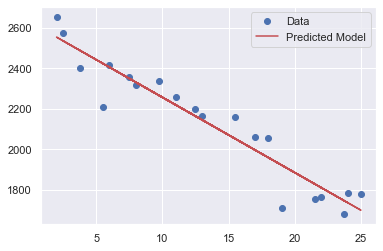

In [46]:
plt.plot(x, y, 'o', label='Data')
plt.plot(x, intercept+slope*x, 'r', label='Predicted Model')
plt.legend()
plt.show()

### Hypothesis Test - slope and intercept  

Hypothesis test is used because of the assumptions made on the model, the errors are normally and independently distributed within the mean and variance.  The population variance cannot be known mostly so a test is used to determine the accuracy of the model using a t statistic.  The denominator of the t statistic is the **estimated standard error** or **standard error** of the variable, **se**.     

Below calculates both the slope and intercept standard errors.  

Testing the significance of the regression implies linear relationship between the observe and response variables.  For the test, the null hypothesis of $\hat{\beta_1} = 0$ is rejected if the absolute value of the test statistic is larger than the t-distribution value; thus, a rejection implies there is a linear relationship between variables.  From the textbook: "rejecting [ the null hypothesis ] could mean either that the straight line model is adequate or ... better results could obtained with the addition of higher order polynomial terms."

In [48]:
# se - slope
# MSres or sigma square
se_B1_hat = np.sqrt( sigma2/Sxx )
t0 = B1_hat/se_B1_hat
print('Standard error of the slope: {0:.02f}'.format(se_B1_hat))
print('test statistic for the slope: {0:.02f}'.format(t0))

Standard error of the slope: 2.89
test statistic for the slope: -12.86


In [49]:
# similarly for the intercept, for comparing against the statsmodel and scipy results
se_B0_hat = np.sqrt( sigma2*( (1/n) + np.power(x_bar, 2.)/Sxx) )
t0_0 = B0_hat/se_B0_hat
print('Standard error of the intercept: {0:.02f}'.format(se_B0_hat))
print('test statistic for the intercept: {0:.02f}'.format(t0_0))

Standard error of the intercept: 44.18
test statistic for the intercept: 59.47


In [53]:
# Finally, to determine the test, based on the values from the t-distribution table with 5% confidence is 2.101.
t_dist = 2.101
if (abs(t0) > t_dist) :
    print('Based on the test statistic of {0:.02f} against the t-distribution value of {1:.03f}, the data rejects the hypothesis and conclude that there is a linear relationship between the variables.'.format(t0, t_dist))
else:
    print('Based on the test statistic of {0:.02f} less than the t-dsitribution of {1:.03f}, there is no linear relationship between the variables.'.format(t0, t_dist))

Based on the test statistic of -12.86 against the t-distribution value of 2.101, the data rejects the hypothesis and conclude that there is a linear relationship between the variables.
